In [1]:
using Pkg
Pkg.instantiate()
using TAMode
using Plots
using StaticArrays
using LinearAlgebra

┌ Info: Precompiling TAMode [294f26d0-a9c2-4f6a-959f-92a060cb6778]
└ @ Base loading.jl:1278


In [7]:
CompParams = ones(12) * 0.5;
tps = @SVector Float64[1e-10, 1, 5];
r = 1:100;

In [8]:
pp = TAMode.compParamm(CompParams)
pY = TAMode.compTAM(tps, pp)
cplot = Array{Float64}(undef, length(tps), 100)

3×100 Array{Float64,2}:
 6.9337e-310  6.9337e-310  6.9337e-310  …  6.9337e-310  6.9337e-310
 6.9337e-310  6.9337e-310  6.9337e-310     6.9337e-310  6.9337e-310
 6.9337e-310  6.9337e-310  6.9337e-310     6.9337e-310  6.9337e-310

In [9]:
for rr = 1:100
    for t = 1:length(tps)
        pYdata = view(pY, t, :, rr)
        cplot[:, rr] .= dot(pYdata, TAMode.pYc)
    end
end

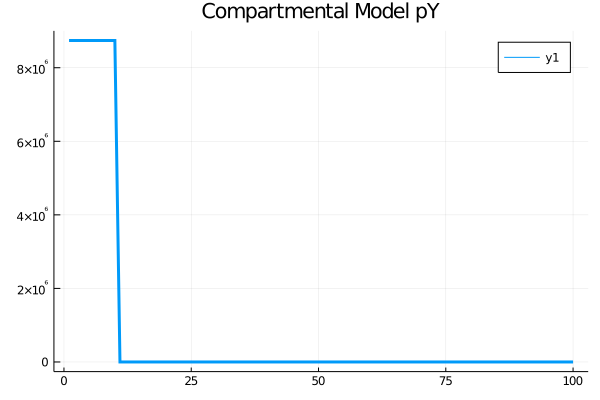

In [10]:
plotpY = cplot[1, :]
plot(r, plotpY, title = "Compartmental Model pY", lw = 3)

if length(tps) > 1
    for tt = 2:length(tps)
        plotpY = cplot[tt, :]
        plot!(r, plotpY, lw = 3)
    end
end
xlabel!("Radius")
ylabel!("pY")